# Exploratory Time Series Data Analysis

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from PythonTsa.datadir import getdtapath
from PythonTsa.plot_acf_pacf import acf_pacf_fig 

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller

## Examine the composition time series that are not examined in Sect. 2.3.

(1) Ft = 0.2 + 0.1t. It is obviously a linear increasing function. If a time series has
one component such as Ft, then it possesses a deterministic trend component.

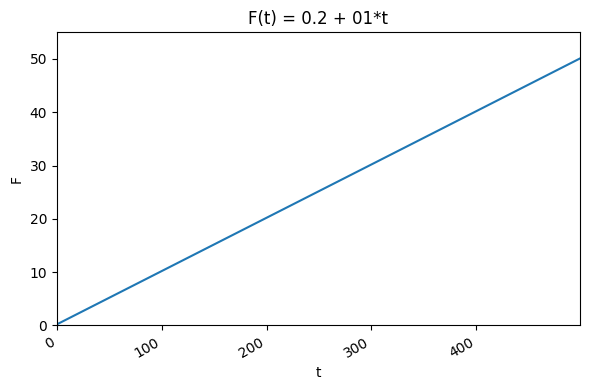

In [6]:
t = np.arange(500)
ft = 0.2 + 0.1*t
ft = pd.Series(ft)

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(ft)
ax.set_xlabel('t')
ax.set_ylabel('F')
ax.set_title("F(t) = 0.2 + 01*t")
ax.set_ylim(0, 55)
ax.set_xlim(0, 499)

fig.autofmt_xdate()
plt.tight_layout()

(2) Pt = 2sin(2πt/50 + 0.3π). It is actually a periodic function with the period
50 or sine wave with the amplitude 2 and phase shift 0.3π. If a time series
has one component such as Pt, then it possesses deterministic seasonality or deterministic seasonal component. But it is not necessary that the seasonal
component is always a periodic function.

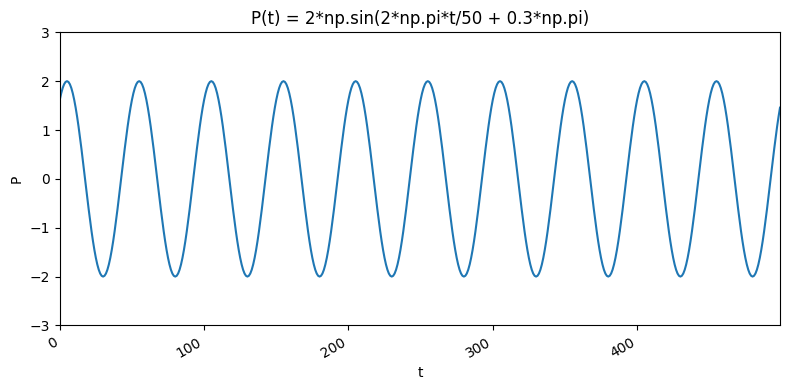

In [8]:
t = np.arange(500)
pt = 2*np.sin(2*np.pi*t/50 + 0.3*np.pi)
pt = pd.Series(pt)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(pt)
ax.set_xlabel('t')
ax.set_ylabel('P')
ax.set_title("P(t) = 2*np.sin(2*np.pi*t/50 + 0.3*np.pi)")
ax.set_ylim(-3, 3)
ax.set_xlim(0,499)

fig.autofmt_xdate()
plt.tight_layout()

(3) Xt = np.random.normal(loc=0,scale=4.2,size=500). It is a
random real number series sampled from the normal distribution with mean
zero and standard deviation 4.2. What is more, it is a Gaussian white noise
Xt ∼ iidN(0,4.22). Any time series except deterministic series has a component
like Xt or more complicated stochastic part, and this random component (part)
is called random (stochastic) variation component.

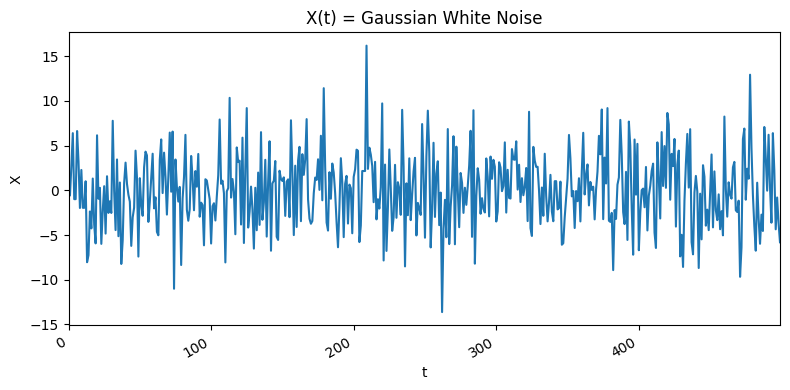

In [10]:
np.random.seed(42)
xt = np.random.normal(0, 4.2, size=500)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(xt)
ax.set_xlabel('t')
ax.set_ylabel('X')
ax.set_title("X(t) = Gaussian White Noise")
ax.set_xlim(0,499)

fig.autofmt_xdate()
plt.tight_layout()

#### M(t) = P(t) + X(t)

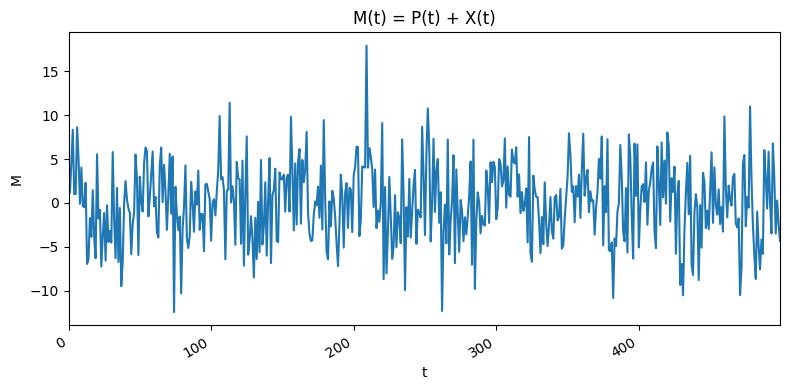

In [12]:
mt = pt + xt

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(mt)
ax.set_xlabel('t')
ax.set_ylabel('M')
ax.set_title("M(t) = P(t) + X(t)")
ax.set_xlim(0,499)

fig.autofmt_xdate()
plt.tight_layout()

Mt = Pt + Xt. The time series Mt is a simple addition of the periodic function
Pt and the Gaussian white noise Xt. We observe that the time series is so contaminated by the
white noise that we would hardly see the periodic (seasonal) component in it.
Moreover, its mean is 2sin(2πt/50 + 0.3π) and not constant. But it is evidently
variance stationary.

#### G(t) = F(t) + P(t) + X(t)

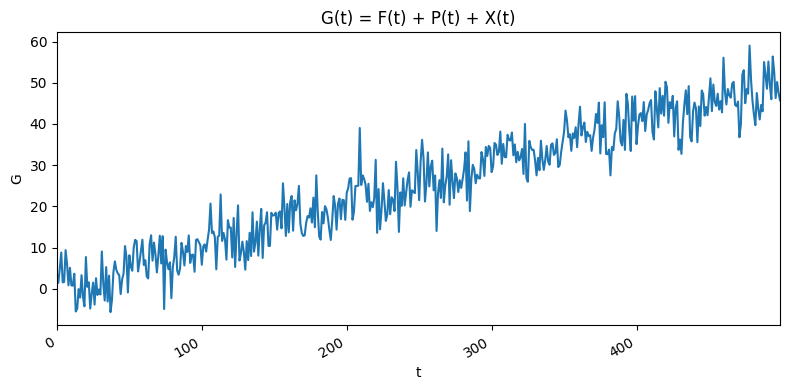

In [15]:
gt = ft + pt + xt

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(gt)
ax.set_xlabel('t')
ax.set_ylabel('G')
ax.set_title("G(t) = F(t) + P(t) + X(t)")
ax.set_xlim(0,499)

fig.autofmt_xdate()
plt.tight_layout()

Gt = Ft + Pt + Xt. The time series Gt is formed by adding the linear increasing
function Ft to Mt. We expect that the time series has a linear increasing trend and it does. On the
other hand, like Mt we could not observe that there is a seasonal component in
it. Besides, it is variance stationary although nonstationary.

#### S(t) = F(t) * P(t) * X(t)

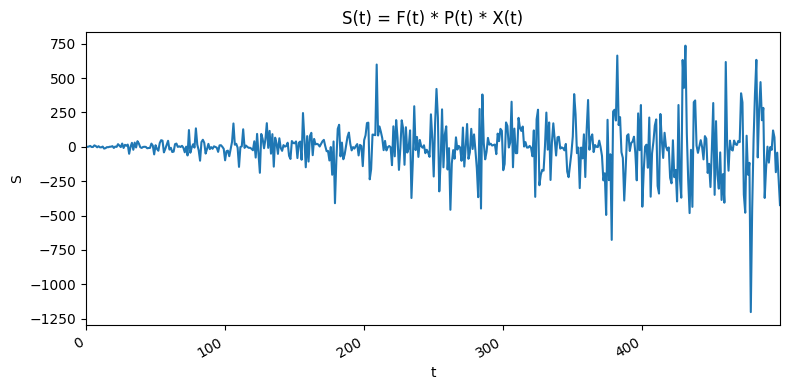

In [18]:
st = ft * pt * xt

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(st)
ax.set_xlabel('t')
ax.set_ylabel('S')
ax.set_title("S(t) = F(t) * P(t) * X(t)")
ax.set_xlim(0,499)

fig.autofmt_xdate()
plt.tight_layout()

The time series St is the result of interaction of Ft, Pt,
and Xt. We cannot see that there exists any trend or seasonality in the time series plot. Both the trend
Ft and the seasonal component Pt are masked. Interesting is that its mean is
zero but variance is not constant. In other words, it is mean stationary although
nonstationary.

#### V(t) = F(t) * ( P(t) + X(t) )

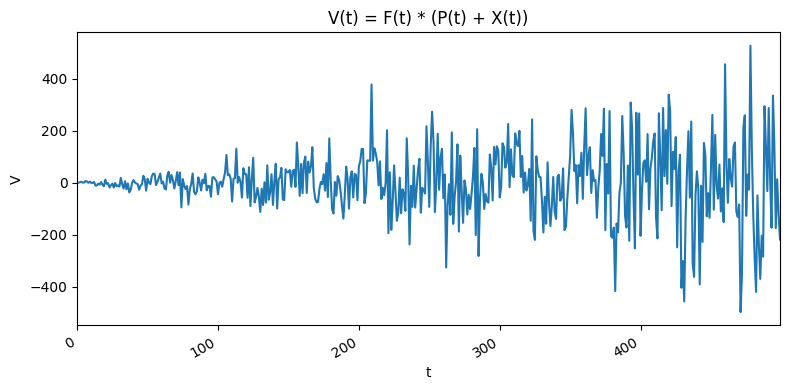

In [21]:
vt = ft * (pt + xt)

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(vt)
ax.set_xlabel('t')
ax.set_ylabel('V')
ax.set_title("V(t) = F(t) * (P(t) + X(t))")
ax.set_xlim(0,499)

fig.autofmt_xdate()
plt.tight_layout()

The time series Vt is shaped by multiplying the two
deterministic components and then adding the random variation component to the product. We
observe that the time series possesses some kind of seasonality but we cannot see
the trend in it. The linear increasing trend is hidden. Additionally, note that its
variance

    Var(Vt) = E(Vt − E(Vt ))^2 = E(Xt )^2 = (4.2)^2

So Vt is variance stationary although not mean stationary.

#### Y(t) = ( F(t) + X(t) ) * P(t)

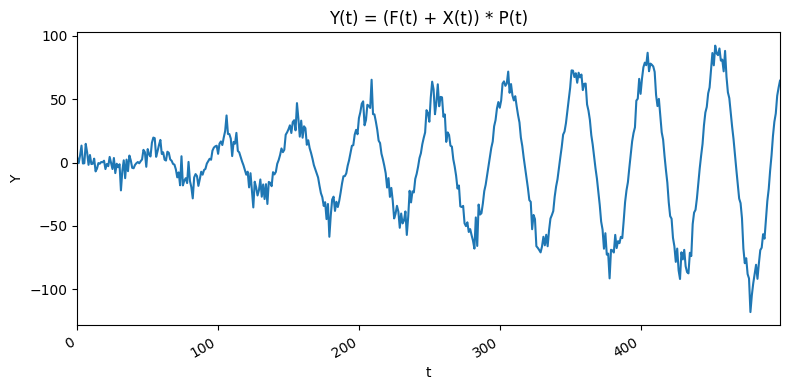

In [24]:
yt = (ft + xt) * pt

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(yt)
ax.set_xlabel('t')
ax.set_ylabel('Y')
ax.set_title("Y(t) = (F(t) + X(t)) * P(t)")
ax.set_xlim(0,499)

fig.autofmt_xdate()
plt.tight_layout()

We see that there seems to be little difference between Yt’s time series plot and Vt’s. In other
words, it is not easy to distinguish one another by checking their time series plots.
Nevertheless, Vt is variance stationary, but the variance of Yt is

    Var(Yt) = E(Yt − E(Yt ))^2 = E(Pt * Xt )^2 = 4.2^2 * Pt^2

and so Yt is not variance stationary.

#### Z(t) = ( P(t) + X(t) ) * F(t)

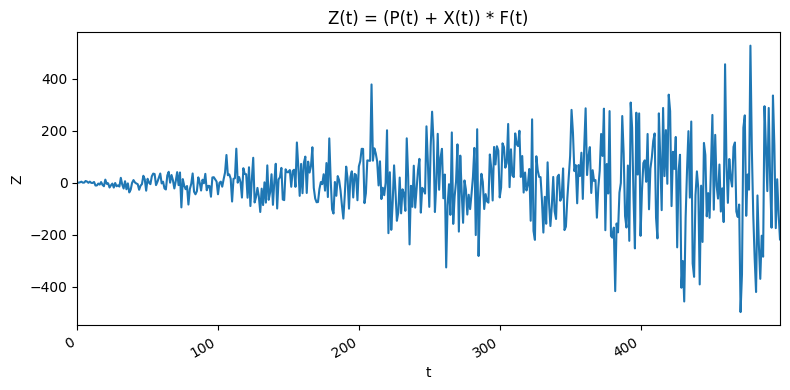

In [27]:
zt = (pt + xt) * ft

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(zt)
ax.set_xlabel('t')
ax.set_ylabel('Z')
ax.set_title("Z(t) = (P(t) + X(t)) * F(t)")
ax.set_xlim(0,499)

fig.autofmt_xdate()
plt.tight_layout()

The time series plot shows
that there seems to be neither trend nor seasonality in it although it does have
both. Besides, it is neither mean stationary nor variance stationary. Its volatility
gets bigger and bigger over time.

## Write and then run the Python code for Fig. 2.12.

Time series plots of Ft ∗ Pt ∗ Xt, Ft ∗ Pt + Xt, Ft ∗ Xt + Pt, and Pt ∗ Xt + Ft

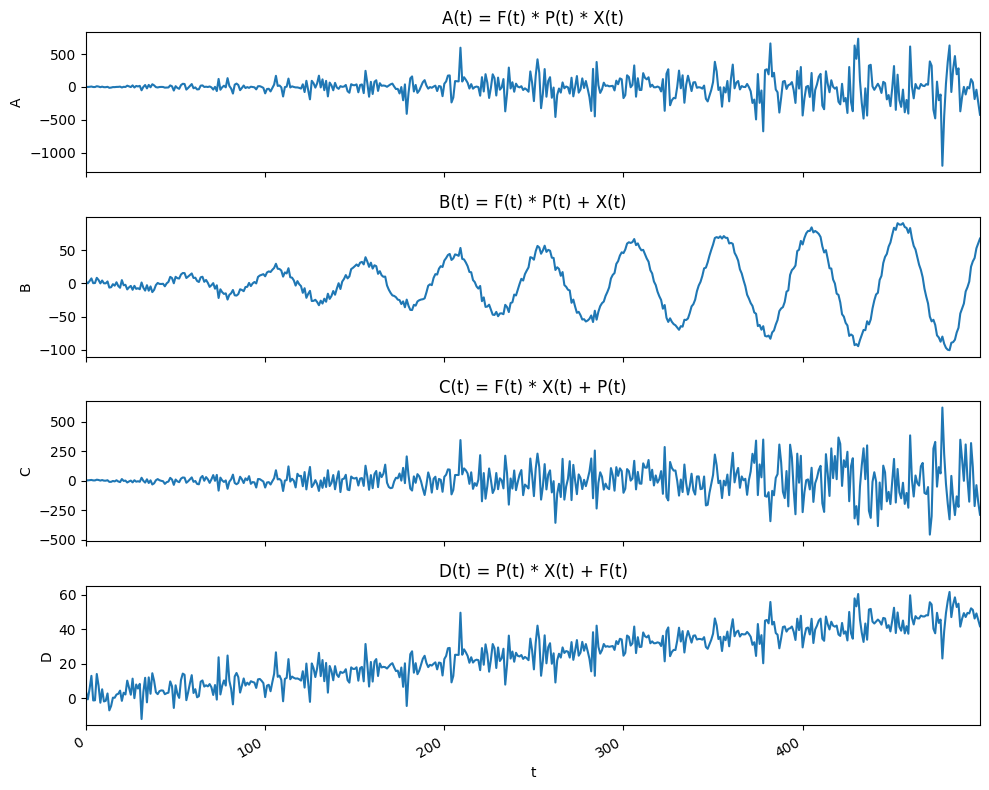

In [31]:
at = ft * pt * xt
bt = ft * pt + xt
ct = ft * xt + pt
dt = pt * xt + ft

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10, 8))

ax1.plot(at)
ax1.set_xlabel('t')
ax1.set_ylabel('A')
ax1.set_title("A(t) = F(t) * P(t) * X(t)")
ax1.set_xlim(0,499)

ax2.plot(bt)
ax2.set_xlabel('t')
ax2.set_ylabel('B')
ax2.set_title("B(t) = F(t) * P(t) + X(t)")
ax2.set_xlim(0,499)

ax3.plot(ct)
ax3.set_xlabel('t')
ax3.set_ylabel('C')
ax3.set_title("C(t) = F(t) * X(t) + P(t)")
ax3.set_xlim(0,499)

ax4.plot(dt)
ax4.set_xlabel('t')
ax4.set_ylabel('D')
ax4.set_title("D(t) = P(t) * X(t) + F(t)")
ax4.set_xlim(0,499)


fig.autofmt_xdate()
plt.tight_layout()

### Make a multiplicative decomposition of the Australian employed total persons in Example 2.5, and then explain properties of the decomposition residuals.

In [33]:
dtapath = getdtapath()

aue =pd.read_excel(dtapath + 'AustraliaEmployedTotalPersons.xlsx', header = 0)

aue.head()

,yearandmonth,EmployedP
0,1978-02-01,5985.659716
1,1978-03-01,6040.560795
2,1978-04-01,6054.213859
3,1978-05-01,6038.264751
4,1978-06-01,6031.342299


In [34]:
# Convert 'yearandmonth' to datetime format
aue['yearandmonth'] = pd.to_datetime(aue['yearandmonth'])

aue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   yearandmonth  490 non-null    datetime64[ns]
 1   EmployedP     490 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.8 KB


In [35]:
aue.head()

,yearandmonth,EmployedP
0,1978-02-01,5985.659716
1,1978-03-01,6040.560795
2,1978-04-01,6054.213859
3,1978-05-01,6038.264751
4,1978-06-01,6031.342299


In [36]:
# Create the correct time index by setting the day to 1st of the month
timeindex = pd.to_datetime(aue['yearandmonth'].dt.to_period('M').dt.start_time)

# Assign the timeindex as the DataFrame index
aue.index = timeindex

# Check the updated DataFrame
aue.head()

,yearandmonth,EmployedP
yearandmonth,,
1978-02-01,1978-02-01,5985.659716
1978-03-01,1978-03-01,6040.560795
1978-04-01,1978-04-01,6054.213859
1978-05-01,1978-05-01,6038.264751
1978-06-01,1978-06-01,6031.342299


In [37]:
aue.tail()

,yearandmonth,EmployedP
yearandmonth,,
2018-07-01,2018-07-01,12572.476450
2018-08-01,2018-08-01,12544.050377
2018-09-01,2018-09-01,12611.208888
2018-10-01,2018-10-01,12652.024422
2018-11-01,2018-11-01,12739.197113


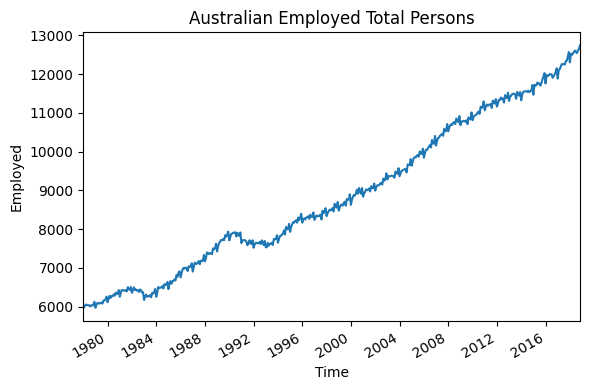

In [38]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(aue.index, aue['EmployedP'])
ax.set_xlabel('Time')
ax.set_ylabel('Employed')
ax.set_title("Australian Employed Total Persons")
#ax.set_ylim(0, 55)
ax.set_xlim(pd.to_datetime('1978-01-01'), pd.to_datetime('2018-11-01'))

fig.autofmt_xdate()
plt.tight_layout()

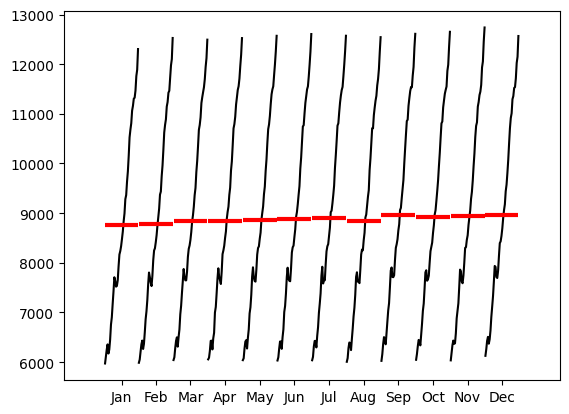

In [39]:
month_plot(aue['EmployedP'])
plt.show()

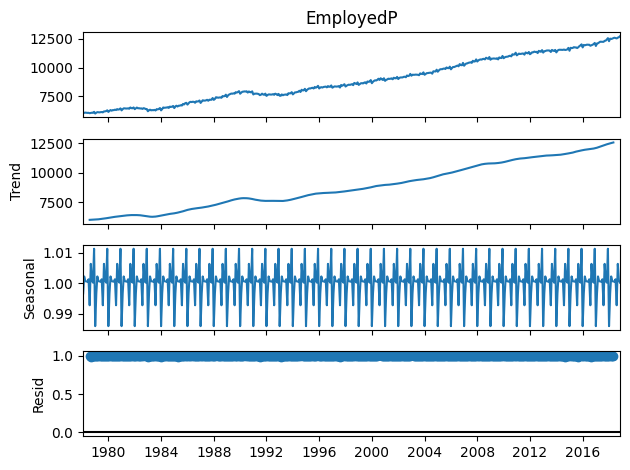

In [40]:
auest_dec = seasonal_decompose (aue['EmployedP'], model = 'multiplicative') #multiplicative
auest_dec.plot()
plt.show()

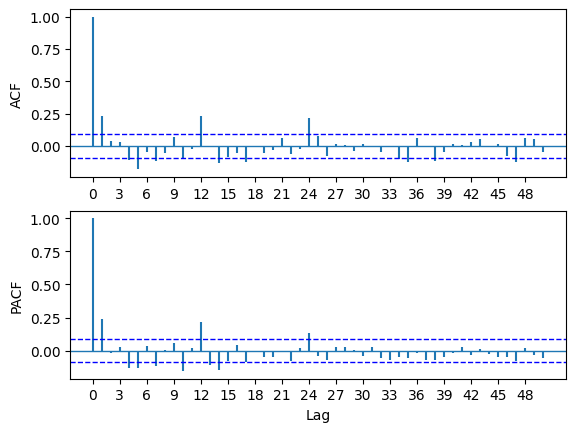

In [41]:
# Drop NA values from the residuals of the 'auest_dec' decomposition result
auest_dec_resid = auest_dec.resid.dropna() 

# Plot both ACF and PACF
acf_pacf_fig(auest_dec_resid, both=True, lag=50)

We clearly can see the seasonality in 12 and 24 months.

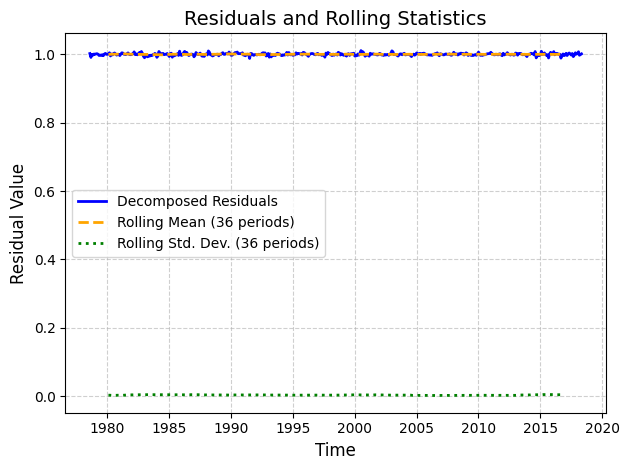

In [43]:
# Store the residuals in a variable for easy reference
ar = auest_dec_resid  

# Calculate the rolling mean with a window of 36 periods, centered around each point
rolm = pd.Series.rolling(ar, window=36, center=True).mean()

# Calculate the rolling standard deviation with a window of 36 periods, centered around each point
rolstd = pd.Series.rolling(ar, window=36, center=True).std()


plt.plot(auest_dec_resid, label='Decomposed Residuals', color='blue', linewidth=2)                  # Plot the residuals from the decomposition
plt.plot(rolm, label='Rolling Mean (36 periods)', color='orange', linestyle='--', linewidth=2)      # Plot the rolling mean of the residuals
plt.plot(rolstd, label='Rolling Std. Dev. (36 periods)', color='green', linestyle=':', linewidth=2) # Plot the rolling standard deviation of the res.
plt.legend(loc='center left')
plt.title('Residuals and Rolling Statistics', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Residual Value', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### Write and then run the Python code for Figs. 2.19 and 2.20 (Hint: use the function rolling().mean() ).

In [45]:
china =pd.read_csv(dtapath + 'gdpquarterlychina1992.1-2017.4.csv', header = 0)

china.head()

,GDP
0,5234.8
1,6536.8
2,7122.5
3,8174.3
4,6803.1


In [46]:
timeindex = pd.date_range('1992-01', periods = len(china), freq = 'QE' )
china.index = timeindex

china.head()

,GDP
1992-03-31,5234.8
1992-06-30,6536.8
1992-09-30,7122.5
1992-12-31,8174.3
1993-03-31,6803.1


In [47]:
china.tail(3)

,GDP
2017-06-30,200558.7
2017-09-30,211595.5
2017-12-31,234582.2


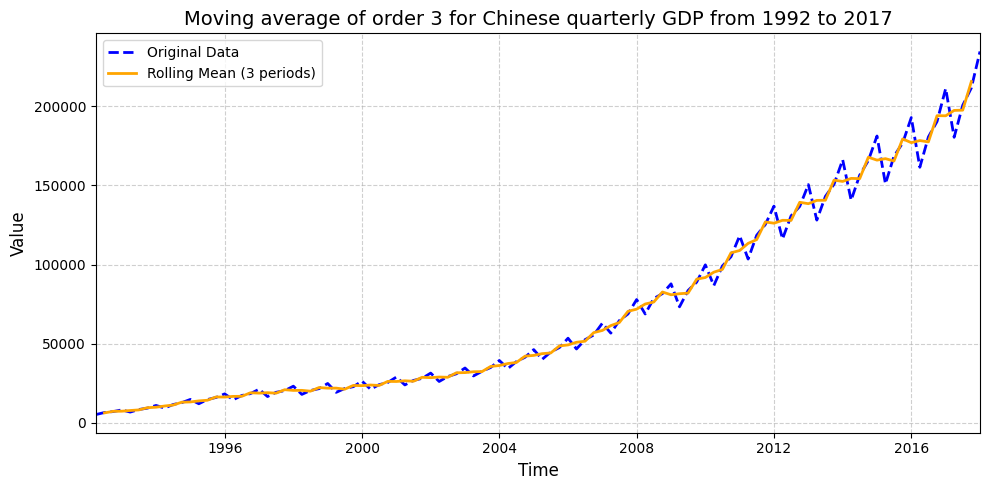

In [48]:
# Apply a rolling mean with a window size of 3 periods, centered around each point
china_rol3 = pd.Series.rolling(china, window=3, center=True).mean(3)

# Apply a rolling mean with a window size of 12 periods, centered around each point
china_rol12 = pd.Series.rolling(china, window=12, center=True).mean(12)


plt.figure(figsize=(10, 5))

plt.plot(china, linestyle='--', color='blue', label='Original Data', linewidth=2)
plt.plot(china_rol3, color='orange', label='Rolling Mean (3 periods)', linewidth=2)

plt.title('Moving average of order 3 for Chinese quarterly GDP from 1992 to 2017', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xlim(pd.to_datetime('1992-03-31'), pd.to_datetime('2017-12-31'))
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

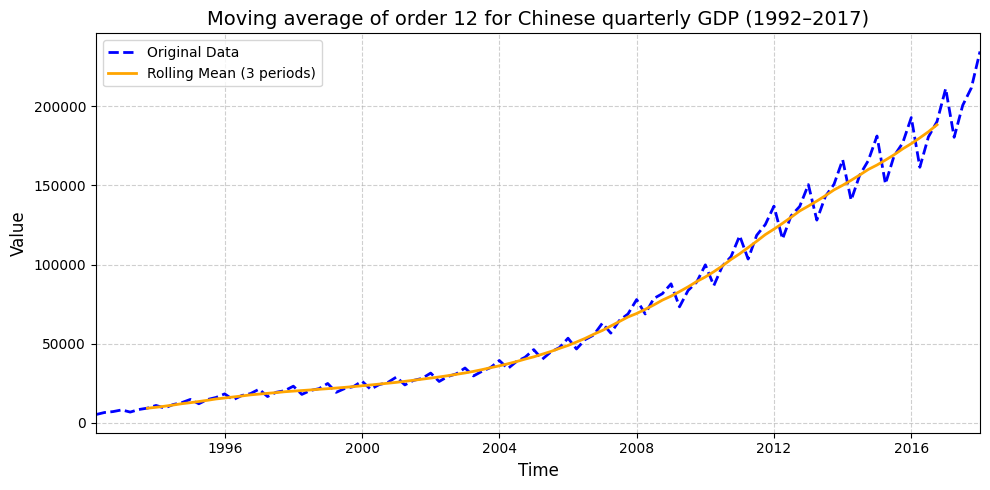

In [49]:
plt.figure(figsize=(10, 5))

plt.plot(china, linestyle='--', color='blue', label='Original Data', linewidth=2)
plt.plot(china_rol12, color='orange', label='Rolling Mean (3 periods)', linewidth=2)

plt.title('Moving average of order 12 for Chinese quarterly GDP (1992–2017)', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xlim(pd.to_datetime('1992-03-31'), pd.to_datetime('2017-12-31'))
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### Find the command for graphing quarterly seasonal plots in the Python package statsmodels , and then graph the seasonal plots for the dataset in Example 2.6 as well as give your comment on the plot.

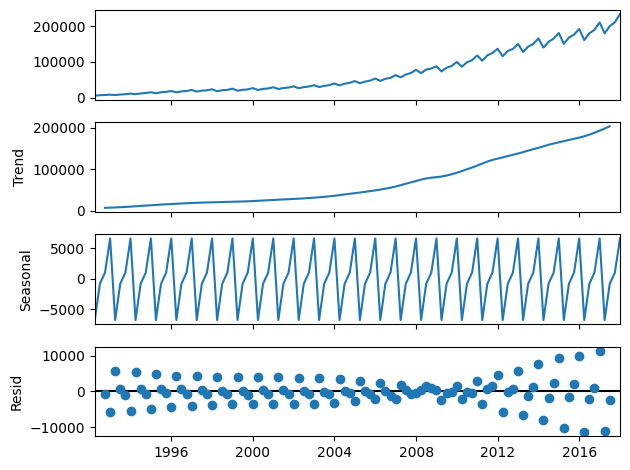

In [51]:
china_seasonadt = seasonal_decompose(china, model = 'aditive', period = 4)
china_seasonadt.plot()
plt.show()

Two facts stand out: 

1) There is a clear strong seasonality in China's GDP;
2) There is a concentration of residuals close to zero during the 2007-2008 financial crisis (Subprime).

### Use the multiplicative Holt-Winters smoothing method to analyze the dataset “gdpquarterlychina1992.1-2017.4.csv,” and compare your results with the results in Example 2.6.

In [54]:
# Dataset
china =pd.read_csv(dtapath + 'gdpquarterlychina1992.1-2017.4.csv', header = 0)
timeindex = pd.date_range('1992-01', periods=len(china), freq='QE')
china.index = timeindex

# Apply the multiplicative Holt-Winters method
model = ExponentialSmoothing(china, trend='add', seasonal='mul', seasonal_periods=4)
hw_model = model.fit()

# Forecast for the next periods (e.g., forecast for 4 periods ahead)
forecast = hw_model.forecast(steps=4)

# Display the forecast
forecast

2018-03-31    197397.595496
2018-06-30    219392.538846
2018-09-30    231703.261384
2018-12-31    255434.946515
Freq: QE-DEC, dtype: float64

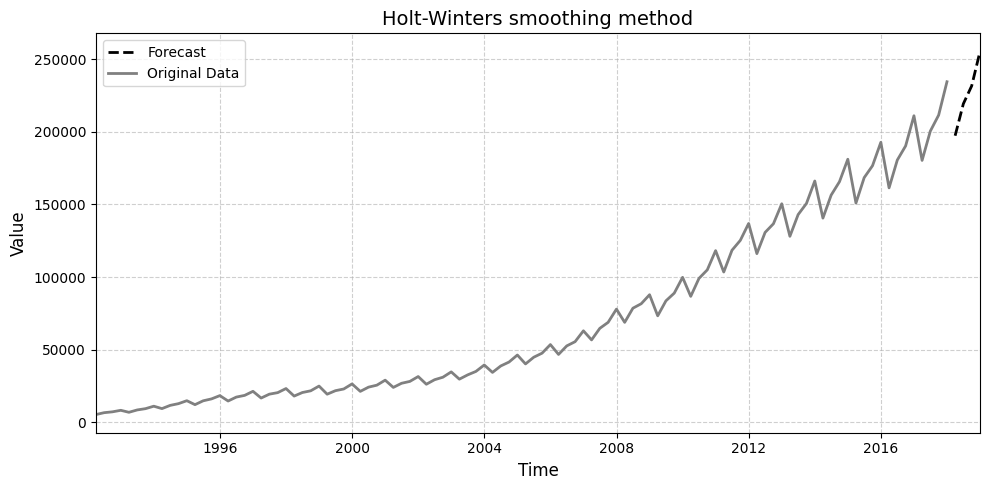

In [55]:
plt.figure(figsize=(10, 5))

plt.plot(forecast, linestyle='--', color='black', label='Forecast', linewidth=2)
plt.plot(china, color='gray', label='Original Data', linewidth=2)

plt.title('Holt-Winters smoothing method', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xlim(pd.to_datetime('1992-03-31'), pd.to_datetime('2018-12-31'))
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### The time series data “AustraliaUnemployedTotalPersons” in the folder “Ptsadata” is from the Australian Bureau of Statistics. Make an exploratory data analysis of it.

In [57]:
# Dataset
aue =pd.read_excel(dtapath + 'AustraliaEmployedTotalPersons.xlsx', header = 0)
aue['yearandmonth'] = pd.to_datetime(aue['yearandmonth'])
timeindex = pd.to_datetime(aue['yearandmonth'].dt.to_period('M').dt.start_time)
aue.index = timeindex

aue.head()

,yearandmonth,EmployedP
yearandmonth,,
1978-02-01,1978-02-01,5985.659716
1978-03-01,1978-03-01,6040.560795
1978-04-01,1978-04-01,6054.213859
1978-05-01,1978-05-01,6038.264751
1978-06-01,1978-06-01,6031.342299


In [58]:
aue.tail(3)

,yearandmonth,EmployedP
yearandmonth,,
2018-09-01,2018-09-01,12611.208888
2018-10-01,2018-10-01,12652.024422
2018-11-01,2018-11-01,12739.197113


In [59]:
aue.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 490 entries, 1978-02-01 to 2018-11-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   yearandmonth  490 non-null    datetime64[ns]
 1   EmployedP     490 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.5 KB


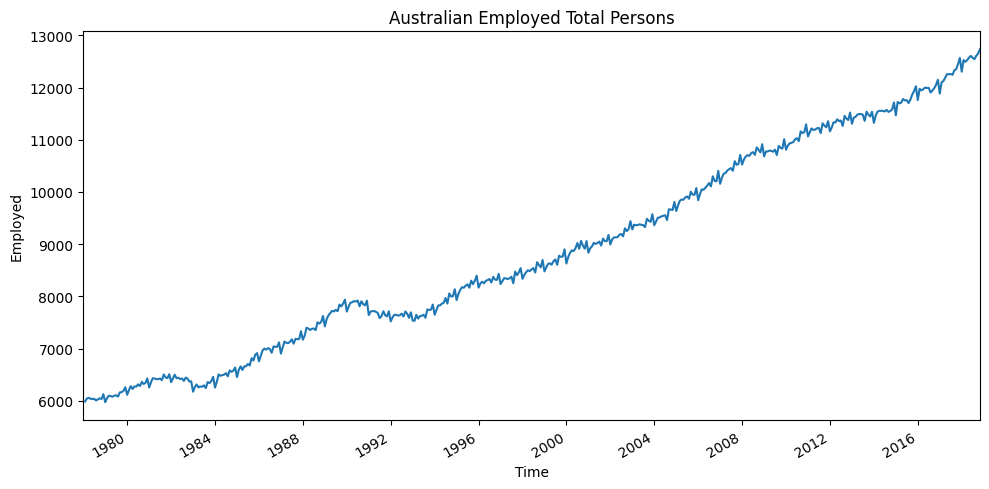

In [60]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(aue.index, aue['EmployedP'])
ax.set_xlabel('Time')
ax.set_ylabel('Employed')
ax.set_title("Australian Employed Total Persons")
ax.set_xlim(pd.to_datetime('1978-01-01'), pd.to_datetime('2018-11-01'))

fig.autofmt_xdate()
plt.tight_layout()

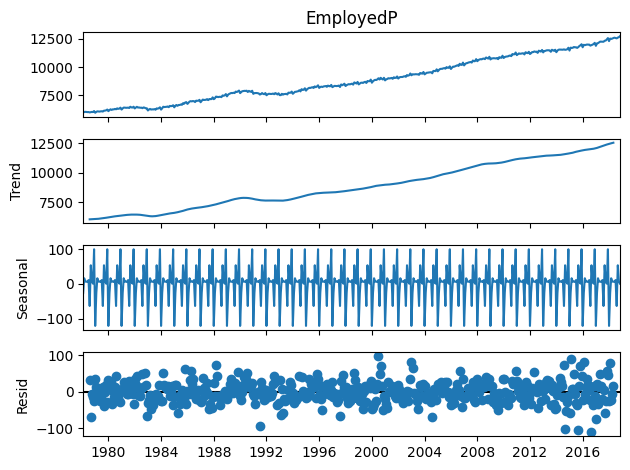

In [61]:
auest_dec = seasonal_decompose (aue['EmployedP'], model = 'aditive') 
auest_dec.plot()
plt.show()

In [62]:
# Run the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(aue['EmployedP'])

# Display ADF test result
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print()

if adf_result[1] < 0.05:
    print("p-value < alpha; Ha: Stationary")
else:
    print("p-value > alpha; H0: Not Stationary")

ADF Statistic: 1.3357616181217817
p-value: 0.9968018504579146

p-value > alpha; H0: Not Stationary


In [63]:
# First-Order differencing
eps_diff1 = np.diff(aue['EmployedP'], n=1)

ad_fuller_result1 = adfuller(eps_diff1)

print(f'ADF Statistic: {ad_fuller_result1[0]}')
print(f'p-value: {ad_fuller_result1[1]}')
print()

if ad_fuller_result1[1] < 0.05:
    print("p-value < alpha; Ha: Stationary")
else:
    print("p-value > alpha; H0: Not Stationary")

ADF Statistic: -4.643798285908038
p-value: 0.00010717431236670401

p-value < alpha; Ha: Stationary


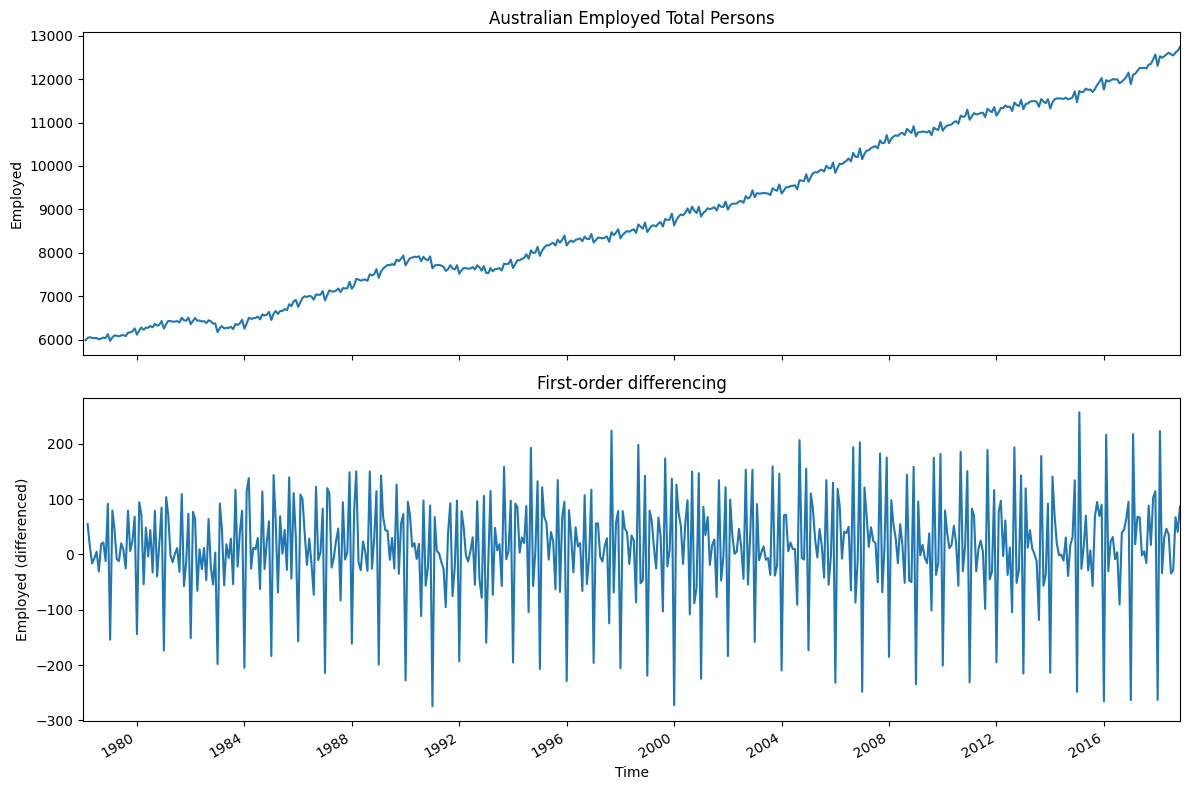

In [64]:
# Calculate the first-order differencing of the 'EmployedP' series
eps_diff1 = aue['EmployedP'].diff().dropna()

# Create subplots for the original series and differenced data
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8))

# Plotting the original data ('EmployedP') in the first subplot (ax1)
ax1.plot(aue['EmployedP'])
ax1.set_xlabel('Time')
ax1.set_ylabel('Employed')
ax1.set_title('Australian Employed Total Persons')

# Plotting the first-order differenced data (eps_diff1) in the second subplot (ax2)
ax2.plot(eps_diff1)
ax2.set_xlabel('Time')
ax2.set_ylabel('Employed (differenced)')
ax2.set_title('First-order differencing')

# Apply the same xlim to both axes
ax1.set_xlim(pd.to_datetime('1978-01-01'), pd.to_datetime('2018-11-01'))
ax2.set_xlim(pd.to_datetime('1978-01-01'), pd.to_datetime('2018-11-01'))

# Auto format the x-axis labels for readability
fig.autofmt_xdate()  
plt.tight_layout()
plt.show()

#### For the interpretation of economic statistics such as unemployment data or GDP data, it is important to identify the presence of seasonal components and to remove them so as to eliminate the effect of seasonal influence on the raw time series and reveal the true trend. This process is called the seasonal adjustment, and if the seasonal components are removed from the original time series data, the resulting values are known as the seasonally adjusted time series. Using the seasonal_decompose function, make a seasonal adjustment of the time series data “gdpquarterlychina1992.1-2017.4.csv,” and describe what is the difference between the seasonally adjusted series and the trend component.

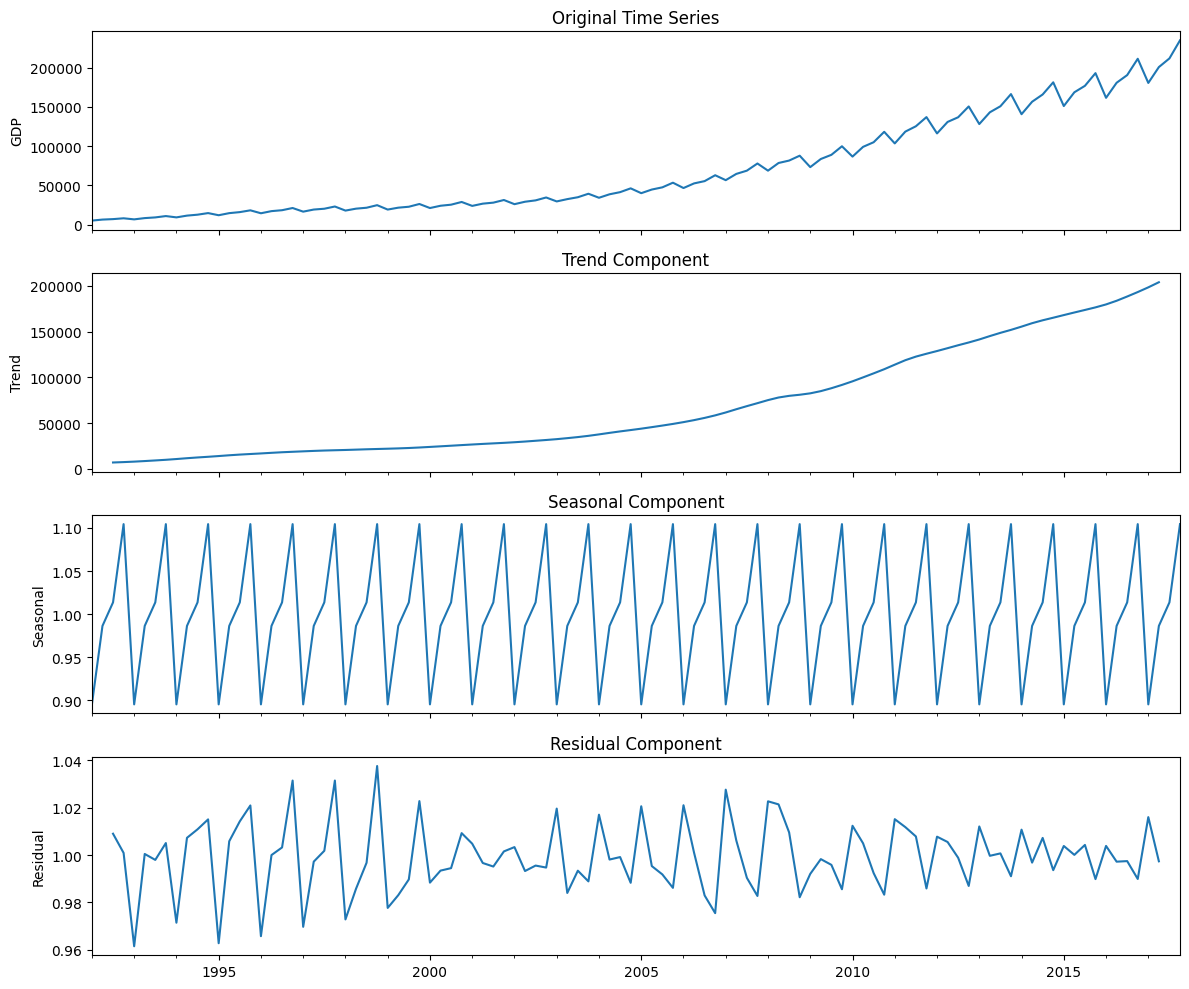

In [66]:
# Perform seasonal decomposition
result = seasonal_decompose(china['GDP'], model='multiplicative', period=4)  # quarterly data, so period = 4

# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

result.observed.plot(ax=axes[0], title="Original Time Series")
axes[0].set_ylabel('GDP')

result.trend.plot(ax=axes[1], title="Trend Component")
axes[1].set_ylabel('Trend')

result.seasonal.plot(ax=axes[2], title="Seasonal Component")
axes[2].set_ylabel('Seasonal')

result.resid.plot(ax=axes[3], title="Residual Component")
axes[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

In [67]:
# Get the seasonally adjusted series by dividing the observed data by the seasonal component
seasonally_adjusted = china['GDP'] / result.seasonal
seasonally_adjusted

1992-03-31      5846.240158
1992-06-30      6626.864983
1992-09-30      7026.198919
1992-12-31      7401.094400
1993-03-31      7597.722247
                  ...      
2016-12-31    191178.626182
2017-03-31    201454.837780
2017-06-30    203322.027007
2017-09-30    208734.583844
2017-12-31    212393.110927
Freq: QE-DEC, Length: 104, dtype: float64

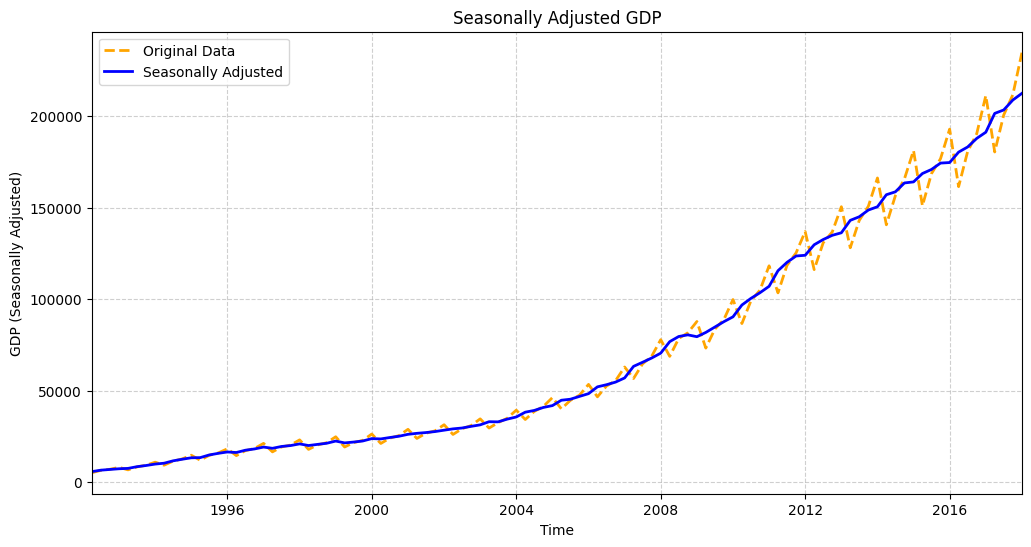


The seasonally adjusted series represents the original data with the seasonal component removed.
It shows the underlying trend and irregular fluctuations without the periodic seasonal effects.
The trend component, on the other hand, shows the long-term movement in the data and smooths out both seasonal and irregular components.
The seasonally adjusted series can be useful for analyzing the true direction and magnitude of changes in the data without the 
influence of seasonal variations.



In [68]:
# Plot the seasonally adjusted series
plt.figure(figsize=(12, 6))

plt.plot(china, linestyle='--', color='orange', label='Original Data', linewidth=2)
plt.plot(seasonally_adjusted, color='blue', label='Seasonally Adjusted', linewidth=2)

plt.title('Seasonally Adjusted GDP')
plt.xlabel('Time')
plt.ylabel('GDP (Seasonally Adjusted)')
plt.legend(loc='upper left')
plt.xlim(pd.to_datetime('1992-03-31'), pd.to_datetime('2017-12-31'))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Print description of the difference between the seasonally adjusted series and the trend component
difference_description = """
The seasonally adjusted series represents the original data with the seasonal component removed.
It shows the underlying trend and irregular fluctuations without the periodic seasonal effects.
The trend component, on the other hand, shows the long-term movement in the data and smooths out both seasonal and irregular components.
The seasonally adjusted series can be useful for analyzing the true direction and magnitude of changes in the data without the 
influence of seasonal variations.
"""

print(difference_description)

### By the Internet, download the Bitcoin price at the end of everyday from July 1, 2018, to the present. Then make an exploratory time series data analysis of the downloaded dataset using the approaches introduced in Chaps. 1 and 2.

In [70]:
bitcoin =pd.read_excel(dtapath + 'BitcoinPrice17-6-23-18-6-22.xlsx', header = 0)
bitcoin

,Time,ClosingP,OpenP,High,Low,Volume,Rate
0,42909,2674.9,2672.8,2725.30,2652.80,8.14K,0.0008
1,42910,2502.6,2674.9,2700.00,2454.10,16.77K,-0.0644
2,42911,2477.7,2502.6,2595.00,2369.10,18.13K,-0.0099
3,42912,2394.6,2480.0,2510.40,2258.70,36.37K,-0.0335
4,42913,2521.2,2393.5,2524.00,2208.10,33.49K,0.0529
...,...,...,...,...,...,...,...
360,43269,6709.2,6443.5,6826.79,6378.60,26.37K,0.0425
361,43270,6737.5,6711.6,6832.90,6666.20,17.38K,0.0042
362,43271,6760.4,6732.7,6818.20,6560.00,18.71K,0.0034
363,43272,6713.5,6760.0,6787.10,6680.10,10.65K,-0.0069


In [71]:
dat = pd.date_range('2018 07 23', periods = len(bitcoin),freq = 'D')
bitcoin.index = dat

bitcoin

,Time,ClosingP,OpenP,High,Low,Volume,Rate
2018-07-23,42909,2674.9,2672.8,2725.30,2652.80,8.14K,0.0008
2018-07-24,42910,2502.6,2674.9,2700.00,2454.10,16.77K,-0.0644
2018-07-25,42911,2477.7,2502.6,2595.00,2369.10,18.13K,-0.0099
2018-07-26,42912,2394.6,2480.0,2510.40,2258.70,36.37K,-0.0335
2018-07-27,42913,2521.2,2393.5,2524.00,2208.10,33.49K,0.0529
...,...,...,...,...,...,...,...
2019-07-18,43269,6709.2,6443.5,6826.79,6378.60,26.37K,0.0425
2019-07-19,43270,6737.5,6711.6,6832.90,6666.20,17.38K,0.0042
2019-07-20,43271,6760.4,6732.7,6818.20,6560.00,18.71K,0.0034
2019-07-21,43272,6713.5,6760.0,6787.10,6680.10,10.65K,-0.0069


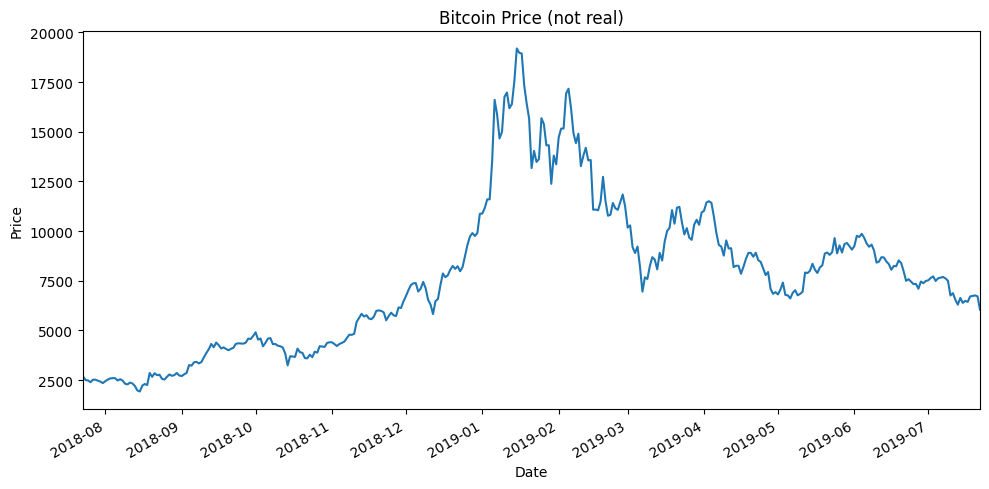

In [72]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(bitcoin.index, bitcoin['ClosingP'])
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.set_title("Bitcoin Price (not real)")
ax.set_xlim(pd.to_datetime('2018-07-23'), pd.to_datetime('2019-07-22'))

fig.autofmt_xdate()
plt.tight_layout()

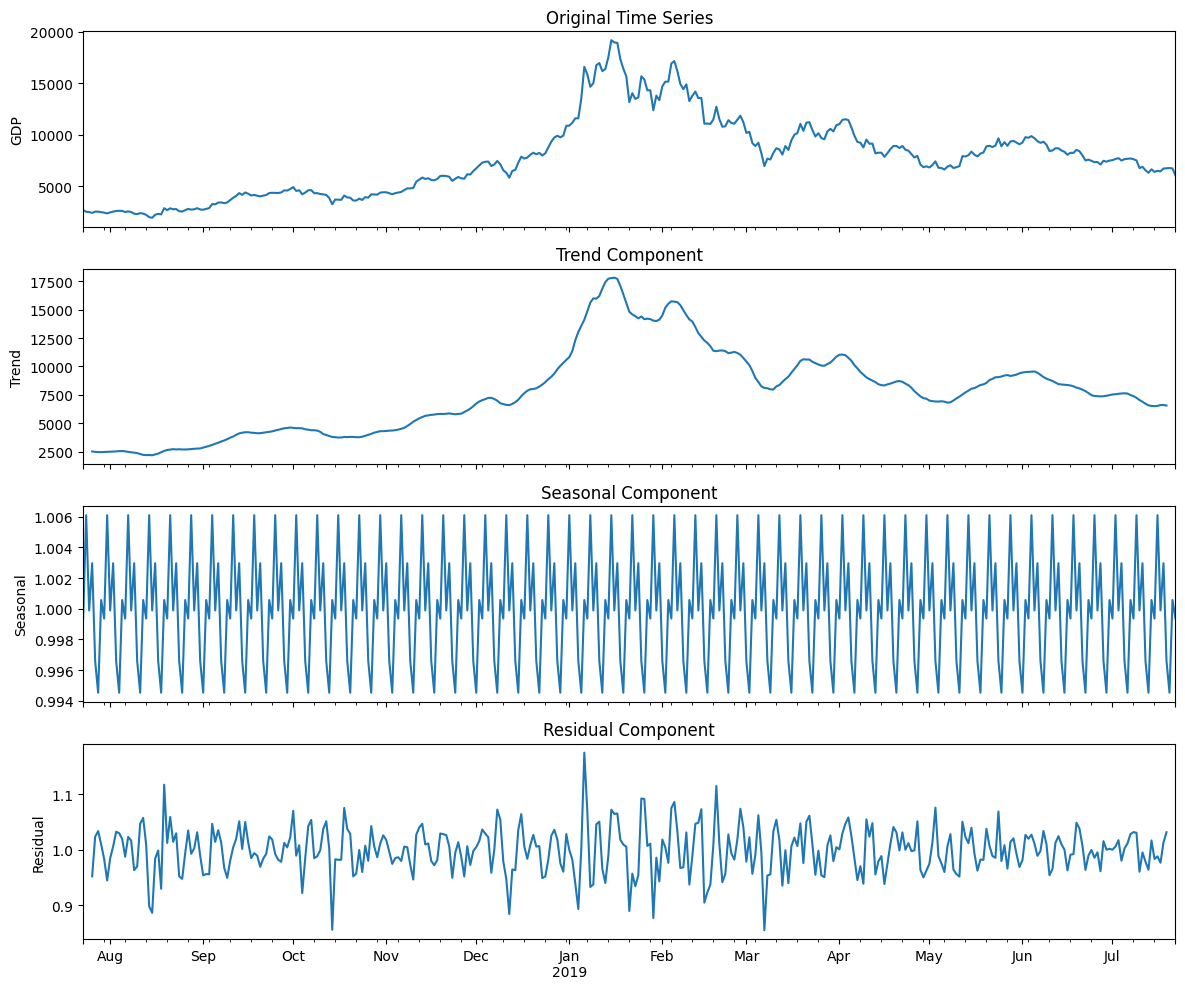

In [73]:
# Perform seasonal decomposition (assuming 'GDP' is the column for GDP data)
result = seasonal_decompose(bitcoin['ClosingP'], model='multiplicative')

# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

result.observed.plot(ax=axes[0], title="Original Time Series")
axes[0].set_ylabel('GDP')

result.trend.plot(ax=axes[1], title="Trend Component")
axes[1].set_ylabel('Trend')

result.seasonal.plot(ax=axes[2], title="Seasonal Component")
axes[2].set_ylabel('Seasonal')

result.resid.plot(ax=axes[3], title="Residual Component")
axes[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

In [74]:
# Run the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(bitcoin['ClosingP'])

# Display ADF test result
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print()

if adf_result[1] < 0.05:
    print("p-value < alpha; Ha: Stationary")
else:
    print("p-value > alpha; H0: Not Stationary")

ADF Statistic: -1.7346684400931802
p-value: 0.4133445451493137

p-value > alpha; H0: Not Stationary


In [75]:
# First-Order differencing
eps_diff1 = np.diff(bitcoin['ClosingP'], n=1)

ad_fuller_result1 = adfuller(eps_diff1)

print(f'ADF Statistic: {ad_fuller_result1[0]}')
print(f'p-value: {ad_fuller_result1[1]}')
print()

if ad_fuller_result1[1] < 0.05:
    print("p-value < alpha; Ha: Stationary")
else:
    print("p-value > alpha; H0: Not Stationary")

ADF Statistic: -4.69703442729918
p-value: 8.523889530990596e-05

p-value < alpha; Ha: Stationary


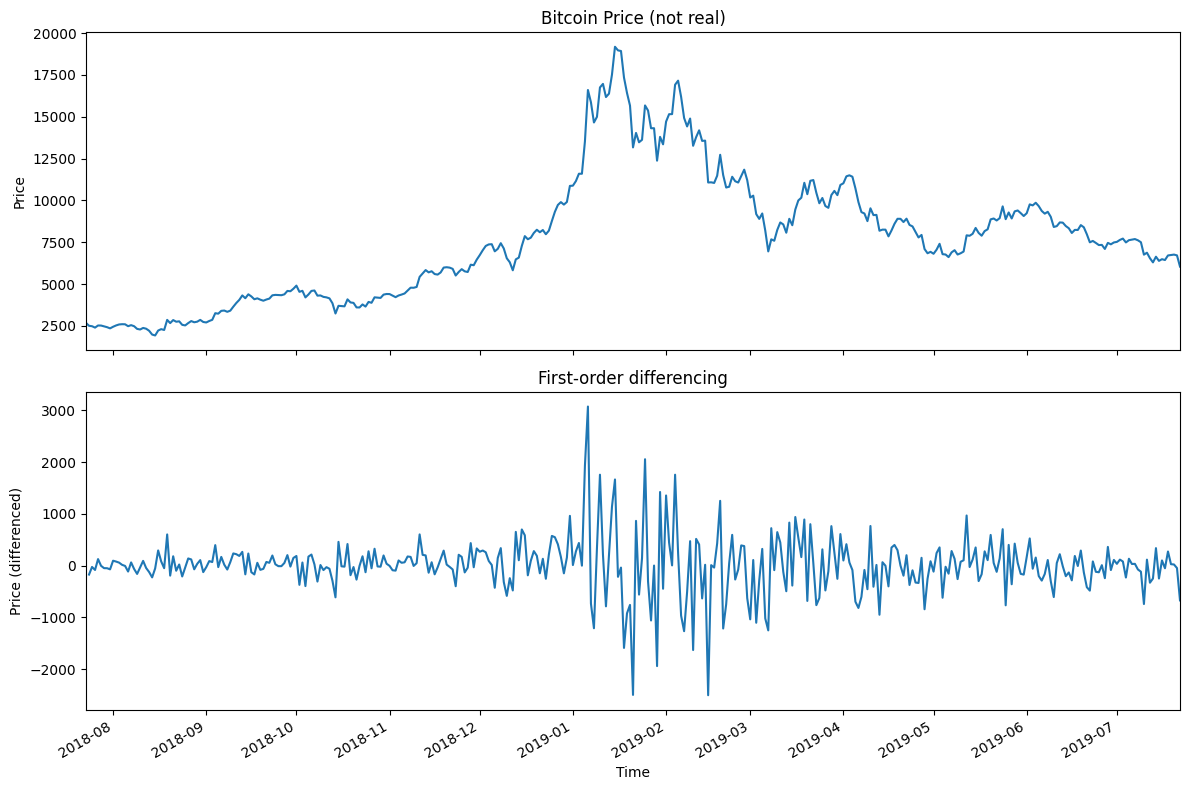

In [76]:
# Calculate the first-order differencing of the 'EmployedP' series
eps_diff1 = bitcoin['ClosingP'].diff().dropna()

# Create subplots for the original series and differenced data
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 8))

# Plotting first subplot (ax1)
ax1.plot(bitcoin['ClosingP'])
ax1.set_xlabel('Time')
ax1.set_ylabel('Price')
ax1.set_title('Bitcoin Price (not real)')

# Plotting second subplot (ax2)
ax2.plot(eps_diff1)
ax2.set_xlabel('Time')
ax2.set_ylabel('Price (differenced)')
ax2.set_title('First-order differencing')

# Apply the same xlim to both axes
ax1.set_xlim(pd.to_datetime('2018-07-23'), pd.to_datetime('2019-07-22'))
ax2.set_xlim(pd.to_datetime('2018-07-23'), pd.to_datetime('2019-07-22'))

# Auto format the x-axis labels for readability
fig.autofmt_xdate()  
plt.tight_layout()
plt.show()

## Deciding Between Additive and Multiplicative Models:

**Additive Model:** If the seasonal fluctuations are relatively constant regardless of the level of the data (e.g., fixed monthly or quarterly variations), use the additive model.

    Example: Temperature data where fluctuations might be around 5°C in winter and summer, regardless of the year or season.

**Multiplicative Model:** If the seasonal fluctuations grow or shrink with the level of the trend (i.e., larger values have proportionally larger seasonal effects), use the multiplicative model.

    Example: Economic data like GDP or retail sales, where seasonal effects (e.g., increased shopping during the holidays) are proportionally larger when sales are higher.